In [4]:
# Import basic librarires
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the data

data = pd.read_excel("customer_churn_large_dataset.xlsx")
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [6]:
# Shape of the data
data.shape

(100000, 9)

In [7]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [9]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [10]:
data["Churn"].value_counts()

0.0    50221
1.0    49779
Name: Churn, dtype: int64

In [11]:
data.select_dtypes(include=object)

,Name,Gender,Location
0,Customer_1,Male,Los Angeles
1,Customer_2,Female,New York
2,Customer_3,Female,Los Angeles
3,Customer_4,Female,Miami
4,Customer_5,Female,Miami
...,...,...,...
99995,Customer_99996,Male,Houston
99996,Customer_99997,Female,New York
99997,Customer_99998,Male,Chicago
99998,Customer_99999,Female,New York


In [12]:
data["Location"].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

<AxesSubplot:xlabel='Monthly_Bill', ylabel='Density'>

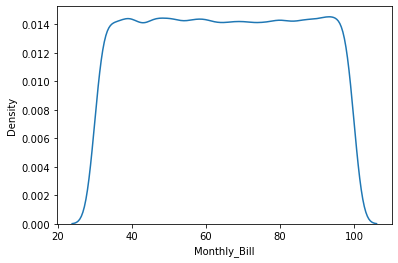

In [13]:
sns.kdeplot(data["Monthly_Bill"])

<AxesSubplot:xlabel='Total_Usage_GB', ylabel='Density'>

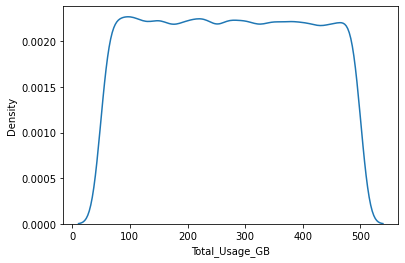

In [14]:
sns.kdeplot(data["Total_Usage_GB"])

<AxesSubplot:xlabel='Subscription_Length_Months', ylabel='Density'>

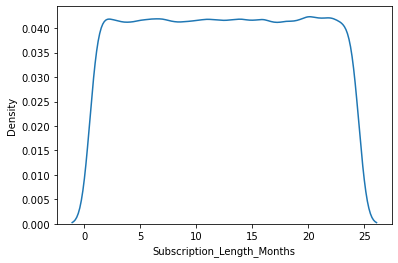

In [15]:
sns.kdeplot(data["Subscription_Length_Months"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

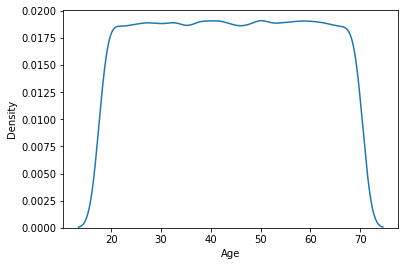

In [16]:
sns.kdeplot(data["Age"])

In [17]:
data["Gender"].replace({"Male":1,"Female":2},inplace=True)

In [18]:
data["Location"].replace({"Los Angeles":1, "New York":2, "Miami":3, "Houston":4, "Chicago":5},inplace=True)

In [19]:
data.drop("Name",inplace=True,axis=1)

In [20]:
x = data.drop("Churn", axis=1)
y = data["Churn"]

In [21]:
data['Age'] = data['Age'].astype(int)

In [23]:
data['Subscription_Length_Months'] = data['Subscription_Length_Months'].astype(int)

In [24]:
data['CustomerID'] = data['CustomerID'].astype(int)

In [26]:
data['Total_Usage_GB'] = data['Total_Usage_GB'].astype(int)

In [31]:
data['Monthly_Bill'] = np.ceil(data['Monthly_Bill']).astype(int)

In [33]:
data['Churn'] = data['Churn'].astype(int)

In [34]:
data

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,1,1,17,74,236,0
1,2,62,2,2,1,49,172,0
2,3,24,2,1,5,86,460,0
3,4,36,2,3,3,98,297,1
4,5,46,2,3,19,59,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,1,4,23,56,226,1
99996,99997,62,2,2,19,62,351,0
99997,99998,64,1,5,17,97,251,1
99998,99999,51,2,2,20,50,434,1


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [36]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
#Training
y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy:",accuracy)
cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion matrix\n",cnf_matrix)
clf_matrix = classification_report(y_train,y_pred)
print("classification report\n",clf_matrix)

Accuracy: 0.5022125
Confusion matrix
 [[40177     0]
 [39823     0]]
classification report
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     40177
         1.0       0.00      0.00      0.00     39823

    accuracy                           0.50     80000
   macro avg       0.25      0.50      0.33     80000
weighted avg       0.25      0.50      0.34     80000



In [38]:
#Testing
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cnf_matrix)
clf_matrix = classification_report(y_test,y_pred)
print("classification report\n",clf_matrix)

Accuracy: 0.5022
Confusion matrix
 [[10044     0]
 [ 9956     0]]
classification report
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     10044
         1.0       0.00      0.00      0.00      9956

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.34     20000



In [39]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
#Testing
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cnf_matrix)
clf_matrix = classification_report(y_test,y_pred)
print("classification report\n",clf_matrix)

Accuracy: 0.4981
Confusion matrix
 [[5037 5007]
 [5031 4925]]
classification report
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     10044
         1.0       0.50      0.49      0.50      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [41]:
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
#Testing
y_pred = model1.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cnf_matrix)
clf_matrix = classification_report(y_test,y_pred)
print("classification report\n",clf_matrix)

Accuracy: 0.50475
Confusion matrix
 [[5107 4937]
 [4968 4988]]
classification report
               precision    recall  f1-score   support

         0.0       0.51      0.51      0.51     10044
         1.0       0.50      0.50      0.50      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [43]:
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred = model2.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cnf_matrix)
clf_matrix = classification_report(y_test,y_pred)
print("classification report\n",clf_matrix)

Accuracy: 0.4959
Confusion matrix
 [[5287 4757]
 [5325 4631]]
classification report
               precision    recall  f1-score   support

         0.0       0.50      0.53      0.51     10044
         1.0       0.49      0.47      0.48      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [ ]:
dt_model = DecisionTreeClassifier()
hyperperameter = {"criterion":["gini","entropy"],
                 "max_depth":np.arange(3,8),
                 "min_samples_split":np.arange(3,15),
                 "min_samples_leaf":np.arange(2,20)}
gscv = GridSearchCV(dt_model,hyperperameter,cv=5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

In [ ]:
#Training
y_pred = dt_model.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy:",accuracy)
cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion matrix\n",cnf_matrix)
clf_matrix = classification_report(y_train,y_pred)
print("classification report\n",clf_matrix)